## 实验介绍

### 1.实验内容

* 通过对给定数据进行聚类分析来了解K-means算法。

### 2.实验目标

* 通过本实验掌握K-means聚类算法

### 3.实验知识点

* K-means算法原理
* K-means算法流程
* K-means算法应用

### 4.实验环境

* python 3.6.5  
* numpy 1.13.3
* matplotlib 2.2.3

## 实验准备

点击屏幕右上方的下载实验数据模块，选择下载KmeansData.txt到指定目录下，然后再依次选择点击上方的File->Open->Upload,上传刚才下载的数据集

## 数据介绍

本数据是随机生成的符合高斯分布的二维样本点

## [K-means] 实验流程

In [8]:
import numpy as np
import matplotlib.pyplot as plt

## 1. 数据的读取与处理

In [9]:
def loadDataSet(fileName):
    """
    函数说明:加载数据集
    parameters:
        fileName - 文件名  
    return：
        DataMat - 数据集
    """
    with open(fileName) as f:
        lines = f.readlines()
        DataMat = []
        for line in lines:
            curLine = line.strip().split('\t')
            fltLine = list(map(float, curLine))
            DataMat.append(fltLine)
        return DataMat

## 2. 样本点间的距离计算

In [10]:
def distEclud(vecA, vecB):
    """
    函数说明:利用欧式距离来计算每个样本点之间的距离
    parameters:
        vecA - A样本的特征向量（本数据中指它的二维坐标值）
        vecB - B样本的特征向量（本数据中指它的二维坐标值）  
    return：
        Dist - 样本点间的欧式距离
    """
    return np.sqrt(np.sum(np.power(vecA - vecB, 2)))

## 3. 簇中心的初始化

In [11]:
def randCent(DataMat, k):
    """
    函数说明:从当前样本点中随机选取k个初始簇中心
    parameters:
         DataMat - 数据集
         k - 聚类后簇的数量
    return：
        centroids - 簇中心列表
    """
    n = np.shape(DataMat)[1]
    centroids = np.mat(np.zeros((k, n)))
    for j in range(n):
        minJ = min(DataMat[:, j])
        rangeJ = float(max(DataMat[:, j]) - minJ)
        centroids[:, j] = minJ + rangeJ * np.random.rand(k, 1)
    return centroids

## 4. K-means的中心思想实现---即通过不断更新簇中心，把与各个簇中心距离相近的样本点归为一类

In [12]:
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    """
    函数说明：K-均值算法
    parameters:
         dataSet -数据集
         k -簇个数
         distMeas -距离计算函数
         createCent -创建初始质心函数
    return：
         centroids -质心列表
         clusterAssment -簇分配结果矩阵
    """
    m = np.shape(dataSet)[0]
    clusterAssment = np.mat(np.zeros((m, 2)))
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = np.inf
            minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j, :], dataSet[i, :])
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            if clusterAssment[i, 0] != minIndex:
                clusterChanged = True
            clusterAssment[i, :] = minIndex, minDist ** 2
        for cent in range(k):
            ptsInClust = dataSet[np.nonzero(clusterAssment[:, 0].A == cent)[0]]
            centroids[cent, :] = np.mean(ptsInClust, axis=0)
    return centroids, clusterAssment

## 5. 实验结果的可视化

In [13]:
def drawDataSet(dataMat, centList, clusterAssment, k):
    """
    函数说明：将聚类结果可视化
    parameters：
         centList -质心列表
         clusterAssment -簇列表
         dataMat -数据集
         k -簇个数
    return:
         A picture
    """
    plt.figure()
    plt.title("K-means")
    plt.xlabel('X')
    plt.ylabel('Y')
    DataMat = np.array(dataMat)
    m = np.shape(DataMat)[0]

    for i in range(k):
        ptsInCurrCluster = DataMat[np.nonzero(clusterAssment[:, 0].A == i)[0]]
        plt.scatter(ptsInCurrCluster[:, 0], ptsInCurrCluster[:, 1], s=30, label=f'Cluster {i}')

    # Plot centroids
    centList = np.array(centList)
    plt.scatter(centList[:, 0], centList[:, 1], s=100, c='red', marker='+', label='Centroids')

    plt.legend()
    plt.show()

## 6. 主函数调用上述函数

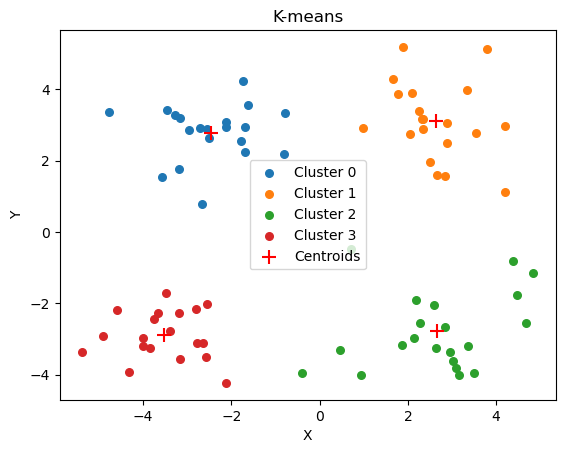

In [14]:
if __name__ == '__main__':
    """
    按照Kmeans原理来调用上述函数
    """
    fileName = 'KmeansData.txt'
    DataMat = np.mat(loadDataSet(fileName))
    k = 4
    myCentroids, clustAssing = kMeans(DataMat, k)
    drawDataSet(DataMat, myCentroids, clustAssing, k)